In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Correct file path and sheet_name parameter
df_pork = pd.read_excel("C:/Users/Winquistt/DSC 680/Week 5 thru 8/history.xls", sheet_name='pork')

# Check the first few rows
df_pork.head(10)


,Date,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail
0,1970-01-01,4.3,52.3,48.0,71.2,81.4,33.4,23.2,10.2
1,1970-02-01,4.7,53.9,49.2,70.4,81.1,31.9,21.2,10.7
2,1970-03-01,4.8,49.6,44.8,68.0,80.7,35.9,23.2,12.7
3,1970-04-01,4.3,45.9,41.6,65.2,79.3,37.7,23.6,14.1
4,1970-05-01,3.7,44.9,41.2,65.2,79.4,38.2,24.0,14.2
5,1970-06-01,3.7,45.9,42.2,66.2,79.4,37.2,24.0,13.2
6,1970-07-01,3.8,48.0,44.2,66.7,80.0,35.8,22.5,13.3
7,1970-08-01,3.6,42.2,38.6,61.9,79.1,40.5,23.3,17.2
8,1970-09-01,3.5,38.9,35.4,59.5,76.1,40.7,24.1,16.6
9,1970-10-01,3.1,34.2,31.1,56.7,74.0,42.9,25.6,17.3


In [3]:
# Convert relevant columns to numeric (if not already)
df_pork['Gross farm value'] = pd.to_numeric(df_pork['Gross farm value'], errors='coerce')
df_pork['Net farm value'] = pd.to_numeric(df_pork['Net farm value'], errors='coerce')
df_pork['Wholesale value'] = pd.to_numeric(df_pork['Wholesale value'], errors='coerce')
df_pork['Retail value'] = pd.to_numeric(df_pork['Retail value'], errors='coerce')
df_pork['Total'] = pd.to_numeric(df_pork['Total'], errors='coerce')
df_pork['Farm-wholesale'] = pd.to_numeric(df_pork['Farm-wholesale'], errors='coerce')
df_pork['Wholesale-retail'] = pd.to_numeric(df_pork['Wholesale-retail'], errors='coerce')

# Ensure the Date column is in datetime format
df_pork['Date'] = pd.to_datetime(df_pork['Date'], errors='coerce')

df_pork.head()


,Date,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail
0,1970-01-01,4.3,52.3,48.0,71.2,81.4,33.4,23.2,10.2
1,1970-02-01,4.7,53.9,49.2,70.4,81.1,31.9,21.2,10.7
2,1970-03-01,4.8,49.6,44.8,68.0,80.7,35.9,23.2,12.7
3,1970-04-01,4.3,45.9,41.6,65.2,79.3,37.7,23.6,14.1
4,1970-05-01,3.7,44.9,41.2,65.2,79.4,38.2,24.0,14.2


In [4]:
df_pork.tail()

,Date,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail
643,2023-08-01,10.279812,133.716594,123.436782,209.600505,483.446677,360.009895,86.163723,273.846172
644,2023-09-01,9.673994,116.654340,106.980346,185.151596,497.630392,390.650046,78.171250,312.478796
645,2023-10-01,9.917241,108.614462,98.697221,168.061642,504.287637,405.590416,69.364421,336.225995
646,2023-11-01,10.027831,100.837506,90.809675,154.942808,487.961532,397.151856,64.133133,333.018723
647,2023-12-01,8.473722,91.109392,82.635670,147.084648,481.624282,398.988612,64.448977,334.539634


In [5]:
# Print the column names to inspect them
print(df_pork.columns)


Index(['Date', 'Byproduct', 'Gross farm value', 'Net farm value',
       'Wholesale value', 'Retail value', 'Total', 'Farm-wholesale',
       'Wholesale-retail'],
      dtype='object')


In [7]:
# If the date column is not in datetime format, convert it
df_pork['Date'] = pd.to_datetime(df_pork['Date'])


In [13]:
# Filter the dataset for 2015
df_2015 = df_pork[df_pork['Date'].dt.year == 2015]


In [15]:
# Group by month and calculate the mean for each month
df_2015_monthly = df_2015.groupby(df_2015['Date'].dt.month)['Retail value'].mean()


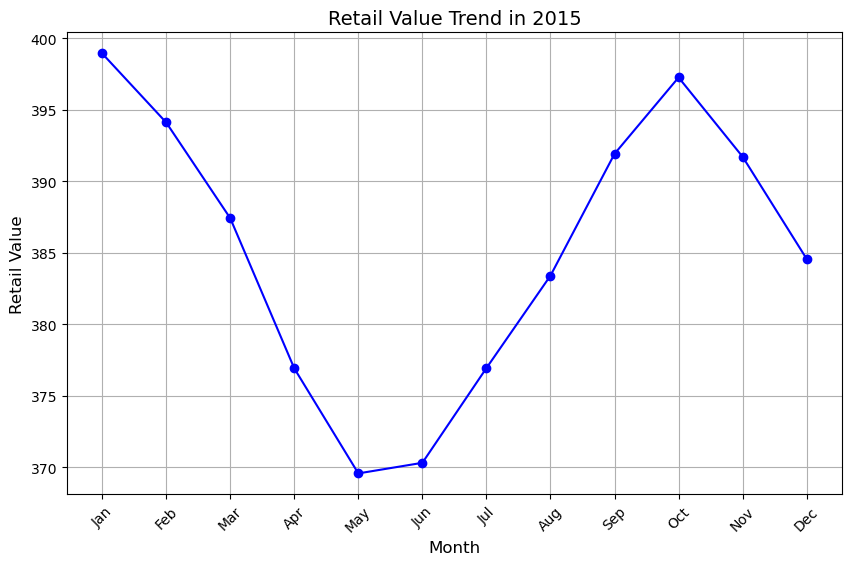

In [17]:
import matplotlib.pyplot as plt

# Plot the trend for Retail value in 2015
plt.figure(figsize=(10, 6))
df_2015_monthly.plot(kind='line', marker='o', color='b')

# Customize the plot
plt.title('Retail Value Trend in 2015', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Value', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()


In [19]:
df_pork.describe()

,Byproduct,Gross farm value,Net farm value,Wholesale value,Retail value,Total,Farm-wholesale,Wholesale-retail
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,5.937524,89.277694,83.340170,121.261603,248.849914,165.509744,37.921433,127.588311
std,2.056443,23.066443,21.422472,30.599780,104.053617,93.833150,17.158442,79.672906
min,1.800000,30.000000,27.400000,52.000000,67.700000,29.200000,12.640370,2.000000
25%,4.639500,75.324707,70.300000,104.232925,171.607600,82.022887,25.486120,57.707775
50%,5.482874,88.172608,82.617835,114.784600,238.445300,145.692069,33.251958,115.898300
75%,6.705993,102.418498,95.582262,134.771680,312.404936,222.763153,42.904627,181.520312
max,13.044152,177.970518,166.468459,241.363584,504.658478,405.590416,119.043954,336.225995


In [21]:
df_pork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              648 non-null    datetime64[ns]
 1   Byproduct         648 non-null    float64       
 2   Gross farm value  648 non-null    float64       
 3   Net farm value    648 non-null    float64       
 4   Wholesale value   648 non-null    float64       
 5   Retail value      648 non-null    float64       
 6   Total             648 non-null    float64       
 7   Farm-wholesale    648 non-null    float64       
 8   Wholesale-retail  648 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 45.7 KB


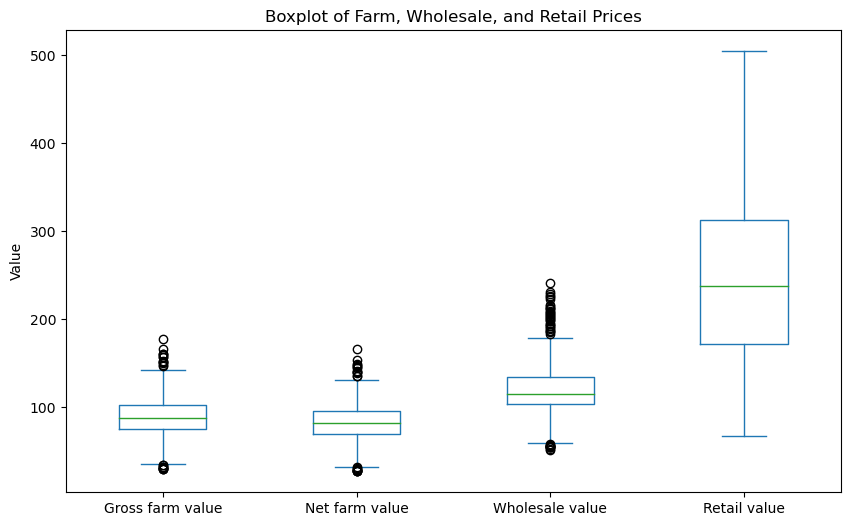

In [23]:
import matplotlib.pyplot as plt

# List the correct column names based on the printed ones
df_pork[['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']].plot(kind='box', figsize=(10,6))

# Add title and labels
plt.title('Boxplot of Farm, Wholesale, and Retail Prices')
plt.ylabel('Value')
plt.show()


In [33]:
print(df_pork['Date'].min())
print(df_pork['Date'].max())

1970-04-01 00:00:00
2023-12-01 00:00:00


In [35]:
df_filter = df_pork[df_pork['Date'].dt.year > 2015]
print(df_filter['Date'].min())
print(df_filter['Date'].max())
print(df_filter.shape)

2016-01-01 00:00:00
2023-12-01 00:00:00
(96, 20)


In [37]:
df_filter.isnull().sum()

Date                      0
Byproduct                 0
Gross farm value          0
Net farm value            0
Wholesale value           0
Retail value              0
Total                     0
Farm-wholesale            0
Wholesale-retail          0
Farm-Wholesale            0
Wholesale-Retail          0
Gross farm value_lag_1    0
Net farm value_lag_1      0
Wholesale value_lag_1     0
Gross farm value_lag_2    0
Net farm value_lag_2      0
Wholesale value_lag_2     0
Gross farm value_lag_3    0
Net farm value_lag_3      0
Wholesale value_lag_3     0
dtype: int64

In [39]:
df_filter.columns

Index(['Date', 'Byproduct', 'Gross farm value', 'Net farm value',
       'Wholesale value', 'Retail value', 'Total', 'Farm-wholesale',
       'Wholesale-retail', 'Farm-Wholesale', 'Wholesale-Retail',
       'Gross farm value_lag_1', 'Net farm value_lag_1',
       'Wholesale value_lag_1', 'Gross farm value_lag_2',
       'Net farm value_lag_2', 'Wholesale value_lag_2',
       'Gross farm value_lag_3', 'Net farm value_lag_3',
       'Wholesale value_lag_3'],
      dtype='object')

In [45]:
print(future_data)  # Look at the input data for these predictions


   Gross farm value  Net farm value  Wholesale value
0              2025            2025             2025
1              2026            2026             2026
2              2027            2027             2027


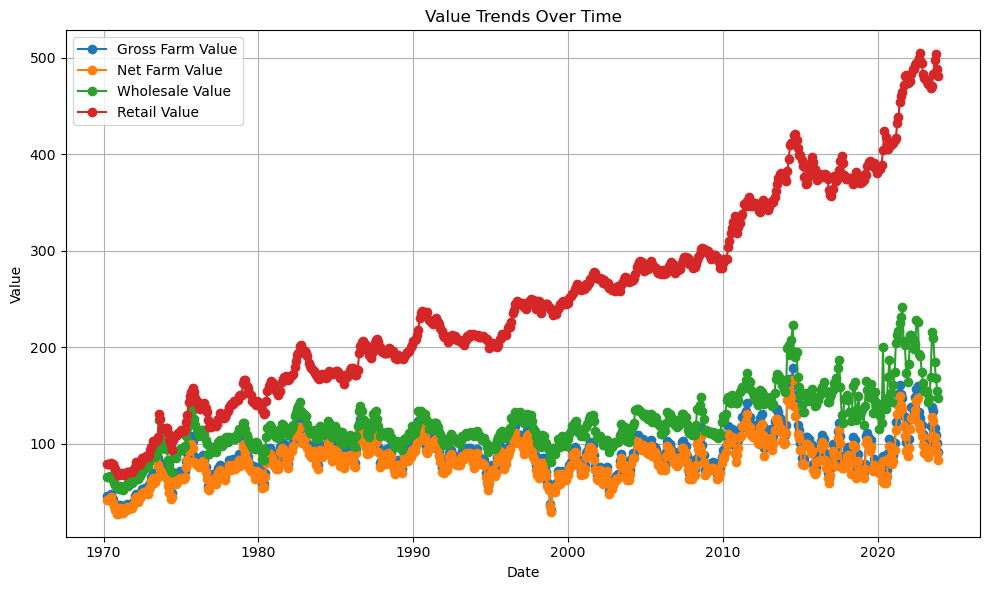

In [47]:
# Calculate derived columns if not already present
if 'Farm-Wholesale' not in df_pork.columns:
    df_pork['Farm-Wholesale'] = df_pork['Wholesale value'] - df_pork['Net farm value']

if 'Wholesale-Retail' not in df_pork.columns:
    df_pork['Wholesale-Retail'] = df_pork['Retail value'] - df_pork['Wholesale value']

# Analyze trends over time (assuming 'Date' is present and formatted as 'month/year')
df_pork['Date'] = pd.to_datetime(df_pork['Date'])
df_pork = df_pork.sort_values('Date')

# Plot trends over time
plt.figure(figsize=(10, 6))
plt.plot(df_pork['Date'], df_pork['Gross farm value'], label='Gross Farm Value', marker='o')
plt.plot(df_pork['Date'], df_pork['Net farm value'], label='Net Farm Value', marker='o')
plt.plot(df_pork['Date'], df_pork['Wholesale value'], label='Wholesale Value', marker='o')
plt.plot(df_pork['Date'], df_pork['Retail value'], label='Retail Value', marker='o')
plt.title("Value Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Absolute Error: 29.885490924773045
Mean Squared Error: 1549.38698946957
Root Mean Squared Error: 39.36225335863751


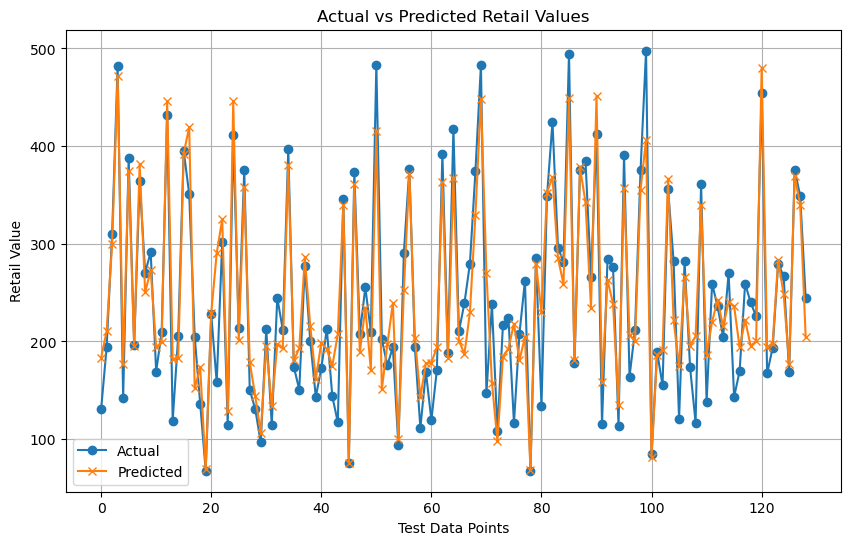

C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Forecasted Values:
642    479.668836
643    481.097739
644    480.983277
645    480.853055
646    480.895552
647    480.900043
648    480.894354
649    480.895171
650    480.895606
651    480.895417
652    480.895412
653    480.895434
Name: predicted_mean, dtype: float64


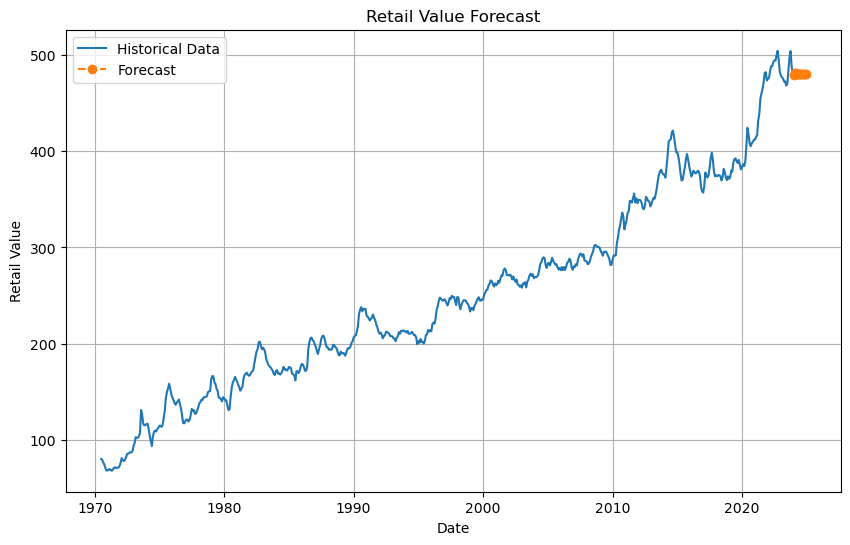

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Convert Date to datetime format and sort
df_pork['Date'] = pd.to_datetime(df_pork['Date'])
df_pork = df_pork.sort_values('Date')

# Select features and target variable
features = ['Gross farm value', 'Net farm value', 'Wholesale value']  # Independent variables
target = 'Retail value'  # Dependent variable

# Create lagged features for time-series modeling
for lag in range(1, 4):  # Lag 1 to 3 months
    for feature in features:
        df_pork[f'{feature}_lag_{lag}'] = df_pork[feature].shift(lag)

# Drop rows with NaN values created by lagging
df_pork = df_pork.dropna()

# Train-test split
X = df_pork[['Gross farm value', 'Net farm value', 'Wholesale value'] + [f'{feature}_lag_{lag}' for feature in features for lag in range(1, 4)]]
y = df_pork[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Retail Values")
plt.xlabel("Test Data Points")
plt.ylabel("Retail Value")
plt.legend()
plt.grid(True)
plt.show()

# ARIMA for time-series forecasting
arima_model = ARIMA(df_pork[target], order=(2, 1, 2))  # Adjust order based on ACF and PACF plots
arima_result = arima_model.fit()

# Forecast future values
forecast = arima_result.forecast(steps=12)  # Forecast for the next 12 months
print("\nForecasted Values:")
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df_pork['Date'], df_pork[target], label="Historical Data")
future_dates = pd.date_range(df_pork['Date'].iloc[-1], periods=12, freq='M')
plt.plot(future_dates, forecast, label="Forecast", marker='o', linestyle='--')
plt.title("Retail Value Forecast")
plt.xlabel("Date")
plt.ylabel("Retail Value")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Winquistt\AppData\Local\Temp\ipykernel_5632\3800402626.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_2022 = df_pork[df_pork['Date'].dt.year == 2022].mean()[
C:\Users\Winquistt\AppData\Local\Temp\ipykernel_5632\3800402626.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  overall_mean_pork = df_pork.mean()[


Average values in 2022:
Gross farm value    133.153849
Net farm value      121.508576
Wholesale value     199.541885
Retail value        489.704690
dtype: float64

Percentage change in 2022 relative to overall averages:
Gross farm value    48.515625
Net farm value      45.166052
Wholesale value     63.878380
Retail value        95.548719
dtype: float64


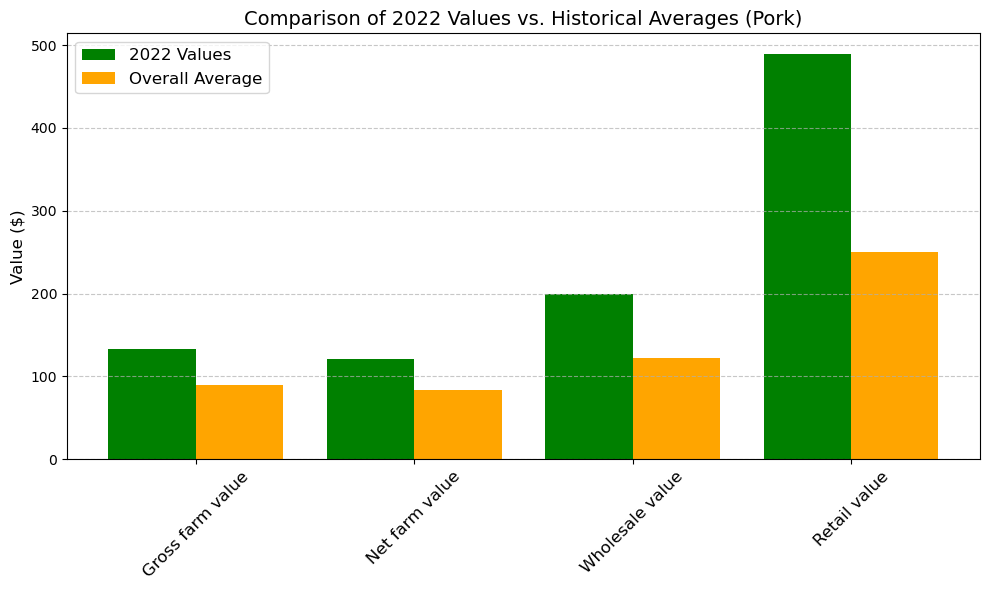

In [51]:
# Filter data for the year 2022 and calculate the mean values
data_2022 = df_pork[df_pork['Date'].dt.year == 2022].mean()[
    ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
]

# Calculate the overall average values
overall_mean_pork = df_pork.mean()[
    ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
]

# Calculate percentage change for 2022 relative to overall averages
percent_change_2022 = ((data_2022 - overall_mean_pork) / overall_mean_pork) * 100

# Display the results
print("Average values in 2022:")
print(data_2022)
print("\nPercentage change in 2022 relative to overall averages:")
print(percent_change_2022)

# Visualization
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
categories = ['Gross farm value', 'Net farm value', 'Wholesale value', 'Retail value']
values_2022 = data_2022.values
values_average_pork = overall_mean_pork.values
x = np.arange(len(categories))

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, values_2022, width=0.4, label='2022 Values', color='green')
plt.bar(x + 0.2, values_average_pork, width=0.4, label='Overall Average', color='orange')

# Customizing the plot
plt.title('Comparison of 2022 Values vs. Historical Averages (Pork)', fontsize=14)
plt.xticks(x, categories, rotation=45, fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the graph
plt.show()
